# Normalization Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@565027b

This `Op` normalizes the values of any given image from a specified minimum and maximum value and normalizes them to a new given minimum and maximum value:

In [2]:
ij.op().help("normalize")

Available operations:
	(IterableInterval out) =
	net.imagej.ops.image.normalize.NormalizeIIComputer(
		IterableInterval out,
		IterableInterval in,
		RealType sourceMin?,
		RealType sourceMax?,
		RealType targetMin?,
		RealType targetMax?)
	(IterableInterval out) =
	net.imagej.ops.image.normalize.NormalizeIIFunction(
		IterableInterval in,
		RealType sourceMin?,
		RealType sourceMax?,
		RealType targetMin?,
		RealType targetMax?,
		boolean isLazy?)

Note that you are allowed to pass in `sourceMin` and `sourceMax`, specifying the **current** lower and upper bounds of your data. These will be linearly mapped to `targetMin` and `targetMax`. If none of the four values are passed through then the `Op` will choose `sourceMin` and `sourceMax` to be the minimum and maximum of your data and `targetMin` and `targetMax` to be the bounds of the type. We will do this in the following example. Let's say that you have some data that only covers a small range of your type interval:

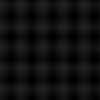

In [3]:
import net.imglib2.type.numeric.integer.UnsignedByteType
    
dims = [100, 100] as int[]
data = ij.op().run("create.img", dims, new UnsignedByteType())

formula = "8 * (Math.cos(0.3*p[0]) + Math.sin(0.3*p[1])) + 16"
ij.op().image().equation(data, formula)

ij.notebook().display(data)

Let's say that you want to stack this data on top of another image, but this image contains data covering the full range of the type

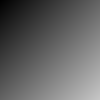

In [4]:
import net.imglib2.type.numeric.integer.UnsignedByteType

backgroundFormula = "p[0] + p[1]"
background = ij.op().run("create.img", dims, new UnsignedByteType())

ij.op().run("equation", background, backgroundFormula)

ij.notebook().display(background)

We cannot simply just stack the data on top of our background since the scale of our data is off and thus our data will be hidden by the background:

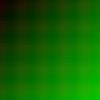

In [5]:
import net.imglib2.view.Views

ij.notebook().display(Views.stack(data, background))

If you stare at the darker section of that image the red is barely visible. This does not help us view both images at the same time. This can be fixed by normalizing our data beforehand:

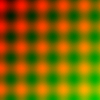

In [6]:
import net.imglib2.view.Views

normalizedData = ij.op().run("normalize", data)

//normalizedData is a ConvertedIterableInterval, so we have to copy the data into a RandomAccessibleInterval so that we can pass it to stack()
//create an image (not ConvertedIterableInterval) of the same size as normalized data and of the destination (converted) type of normalizedData
output = ij.op().run("create.img", normalizedData, normalizedData.getDestinationType())
//Copy the data from normalizedData to output
ij.op().run("copy.iterableInterval", output, normalizedData)

ij.notebook().display(Views.stack(output, background))